In [2]:
# Always a bit risky, but I think the chance for name space convolution is small 
import numpy as np
import os
import pandas as pd
from plotnine import *
from plotnine.data import mtcars # Classic example data set 

mtcars["gear"] = pd.Categorical(mtcars["gear"]) # Make it easier downstream 

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

# Proportions when saving figures 
BASE_HEIGHT = 5
BASE_WIDTH = 7.0

# Data on mobile phone operating system market shares 
os_data = pd.read_csv("Data/mobile_os_market_share.csv")
col_rainbow = ["#FF0000", "#FFBF00", "#80FF00", "#00FF40", "#00FFFF", "#0040FF", "#8000FF", "#FF00BF"]

# Directory for saving figures
dir_save = "./Figs/"
if not os.path.isdir(dir_save):
    os.mkdir(dir_save)

## Fixing a bad looking plot

The terrible plot has a lot of problems.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Ugly_plot.png


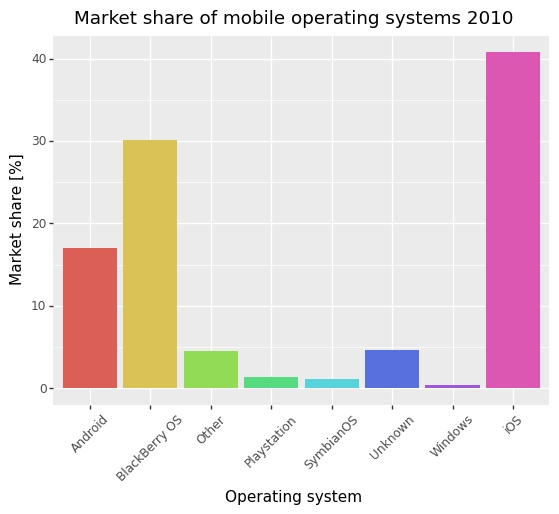

<ggplot: (131615300587)>

In [3]:
os_data2010 = os_data.query("Year == 2010")

p = (ggplot(os_data2010, aes("OperatingSystem", "Share", fill = "OperatingSystem")) 
  + geom_bar(stat="identity")  
  + scale_color_manual(values=col_rainbow)
  + labs(x = "Operating system", y = "Market share [%]", title = "Market share of mobile operating systems 2010") 
  + theme(axis_text_x = element_text(angle = 45, hjust=0.1), 
          legend_position="none"))


p.save("Figs/Ugly_plot.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

p

A bad theme and terrible palette are a few:

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Fix1.png


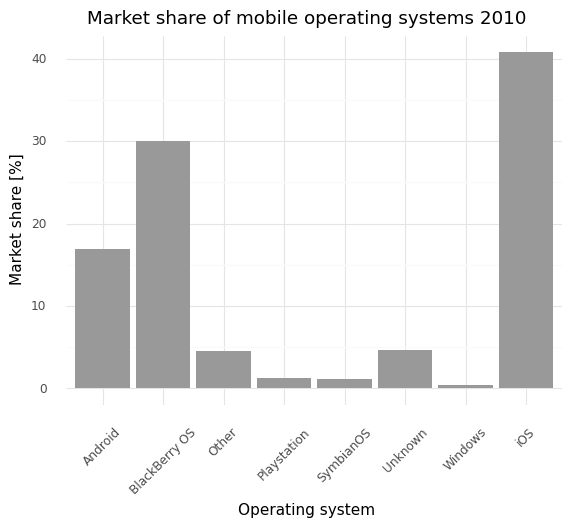

<ggplot: (131615867380)>

In [4]:
p = (ggplot(os_data2010, aes("OperatingSystem", "Share")) 
  + geom_bar(stat="identity", fill=cbPalette[7])  
  + labs(x = "Operating system", y = "Market share [%]", title = "Market share of mobile operating systems 2010") 
  + theme_minimal()
  + theme(axis_text_x = element_text(angle = 45, hjust=0.1), 
          legend_position="none"))

p.save("Figs/Fix1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p

The fact that the columns are not ordered contributes to visual noise, so often it helps if put the columns in order 

['Windows' 'SymbianOS' 'Playstation' 'Other' 'Unknown' 'Android'
 'BlackBerry OS' 'iOS']


C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Fix2.png


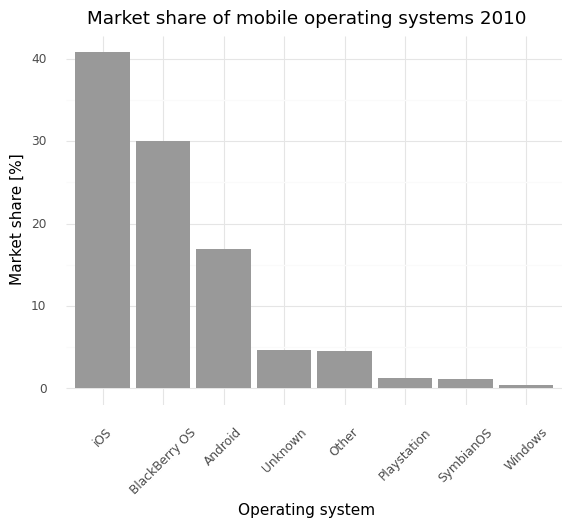

<ggplot: (131615941497)>

In [5]:
pos = os_data2010["OperatingSystem"].values[np.argsort(os_data2010["Share"])]
print(pos)
p = (ggplot(os_data2010, aes("OperatingSystem", "Share")) 
  + geom_bar(stat="identity", fill=cbPalette[7])  
  + labs(x = "Operating system", y = "Market share [%]", title = "Market share of mobile operating systems 2010") 
  + scale_x_discrete(limits=pos[::-1])
  + theme_minimal()
  + theme(axis_text_x = element_text(angle = 45, hjust=0.1), 
          legend_position="none"))

p.save("Figs/Fix2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p

Still, the axis are hard to read (and will get even worse with more categories). Here a single flip can make a lot:

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Fix3.png


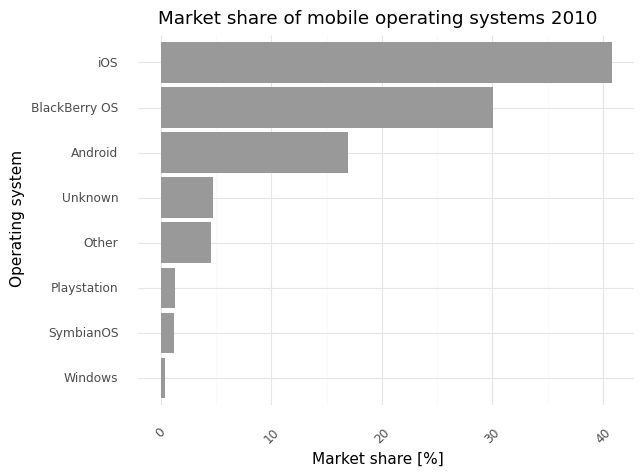

<ggplot: (131615943909)>

In [6]:
p = (ggplot(os_data2010, aes("OperatingSystem", "Share")) 
  + geom_bar(stat="identity", fill=cbPalette[7])  
  + labs(x = "Operating system", y = "Market share [%]", title = "Market share of mobile operating systems 2010") 
  + scale_x_discrete(limits=pos)
  + coord_flip()
  + theme_minimal()
  + theme(axis_text_x = element_text(angle = 45, hjust=0.1), 
          legend_position="none"))

p.save("Figs/Fix3.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p      

Often with barplots we might want to add one more dimension in the data, here the visualizer controls the narrative. If we want to answer the question, which company was third biggest 2009 and 2011 the plot below works well 

,Year,OperatingSystem,Share,OperatingSystemCat
0,2009,iOS,59.35,iOS
1,2009,Android,5.58,Android
2,2009,BlackBerry OS,14.42,BlackBerry OS
3,2009,Windows,2.91,Windows
4,2009,SymbianOS,2.50,SymbianOS
5,2009,Playstation,4.66,Playstation
6,2009,Other,4.06,Other
7,2009,Unknown,6.54,Unknown
8,2010,iOS,40.77,iOS
9,2010,Android,16.97,Android


C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Os_year.png


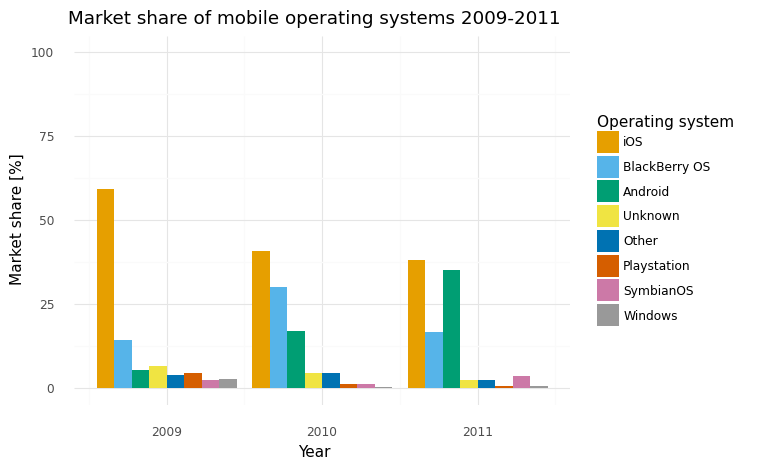

<ggplot: (131616235454)>

In [7]:
pos = ["iOS","BlackBerry OS", "Android", "Unknown", "Other", "Playstation", "SymbianOS", "Windows"]
os_data91011 = os_data.query("Year == 2009 or Year == 2010 or Year == 2011")
# Here I refactor operating system into a factor so I plot in the desired order
os_data91011 = os_data91011.assign(OperatingSystemCat = pd.Categorical(os_data91011["OperatingSystem"], 
                                                        categories=pos))

p = (ggplot(os_data91011, aes("Year", "Share", fill="OperatingSystemCat")) 
  + geom_bar(stat = "identity", position = "dodge") 
  + labs(x = "Year", y = "Market share [%]", title = "Market share of mobile operating systems 2009-2011") 
  + scale_fill_manual(values = cbPalette, name="Operating system") 
  + ylim(0, 100)
  + theme_minimal())
display(os_data91011)
p.save("Figs/Os_year.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p

And if we want to ask which year was Blackberry second biggest year the plot below works well

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/OS_company.png


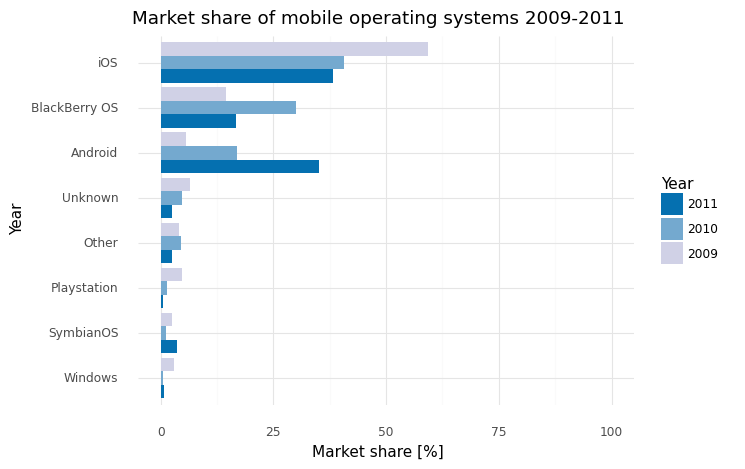

<ggplot: (131616408218)>

In [8]:
col = ["#0570b0", "#74a9cf", "#d0d1e6"] # Quantitative colors 
# Make Year categorical so I can assign a color scale to it
os_data91011 = os_data91011.assign(Year = pd.Categorical(os_data91011["Year"], 
                                                        categories=[2011, 2010, 2009]))
os_data91011 = os_data91011.assign(OperatingSystemCat = pd.Categorical(os_data91011["OperatingSystem"], 
                                                        categories=pos[::-1]))
                                                        
p = (ggplot(os_data91011, aes("OperatingSystemCat", "Share", fill="Year")) 
  + geom_bar(stat = "identity", position = "dodge") 
  + labs(x = "Year", y = "Market share [%]", title = "Market share of mobile operating systems 2009-2011") 
  + scale_fill_manual(values = col) 
  + coord_flip()
  + ylim(0, 100)
  + theme_minimal())

p.save("Figs/OS_company.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p

The thing is extracting information from a plot is taxing. If we want to efficiently communicate a message we must arrange the plot in such a way that we highlight the important aspects for our narrative. For example see below:

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Student_worse.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Student_worse_help.png


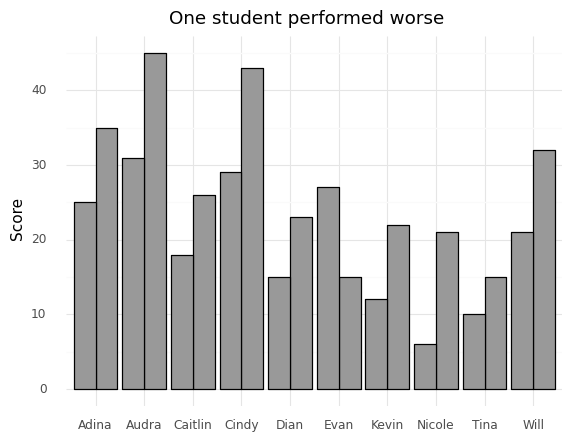

<ggplot: (131616583575)>

In [9]:
data1 = pd.DataFrame({"Name" : ["Audra", "Audra", "Adina", "Adina", "Caitlin", "Caitlin", "Cindy", "Cindy", "Dian", "Dian", "Kevin", "Kevin", "Nicole", "Nicole", "Evan", "Evan", "Tina", "Tina", "Will", "Will"],
                      "Score" : [31, 45, 25, 35, 18, 26, 29, 43, 15, 23, 12, 22, 6, 21, 27, 15, 10, 15, 21, 32],
                      "Test" : ["1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2", "1", "2"], 
                      "Worse" : ["0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "0", "1", "1", "0", "0", "0", "0"]})

col = [cbPalette[7], cbPalette[4]]

p1 = (ggplot(data1, aes("Name", "Score", group="Test"))
    + geom_bar(stat="identity", position="dodge", color="black", fill=cbPalette[7])
    + scale_fill_manual(values=col)
    + labs(x = "", title = "One student performed worse")
    + theme_minimal()
    + theme(legend_position="none", 
            axis_text_x = element_text(vjust=-0.4)))

p2 = (ggplot(data1, aes("Name", "Score", group="Test", fill="Worse"))
    + geom_bar(stat="identity", position="dodge", color="black")
    + scale_fill_manual(values=col)
    + labs(x = "", title = "One student performed worse")
    + theme_minimal()
    + theme(legend_position="none", 
            axis_text_x = element_text(vjust=-0.4)))


p1.save("Figs/Student_worse.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Student_worse_help.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

p1

An important aspect with barplots is that they should **always** start from zero. If not they can be misgiving, however, sometimes when starting from zero we experience substantial visual clutter, a good example is when plotting expected lifespan.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Many_amounts.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Many_amounts_dot.png


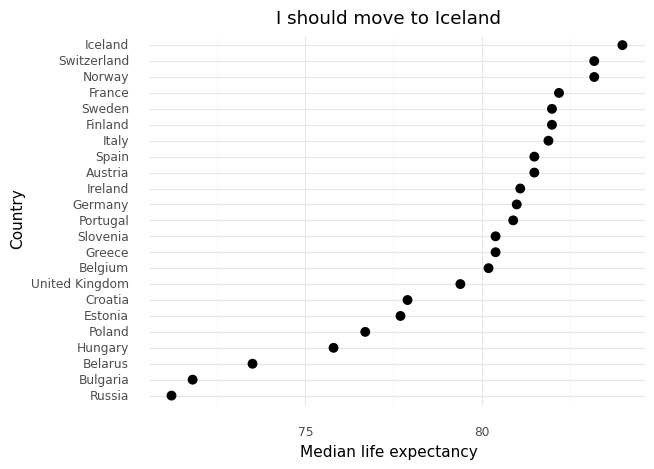

<ggplot: (131615942259)>

In [10]:
data_life = pd.read_csv("Data/Life_tidy.csv")
data2020 = data_life.query("Year == 2020")
pos = data2020["country"].values[np.argsort(data2020["Life_expactancy"])]

p1 = (ggplot(data2020, aes("country", "Life_expactancy"))
    + geom_bar(stat="identity")
    + scale_x_discrete(limits=pos)
    + coord_flip()
    + labs(x = "Country", y = "Median life expectancy", title = "I should move to Iceland")
    + theme_minimal())

p2 = (ggplot(data2020, aes("country", "Life_expactancy"))
    + geom_point(size = 3.0)
    + scale_x_discrete(limits=pos)
    + coord_flip()
    + labs(x = "Country", y = "Median life expectancy", title = "I should move to Iceland")
    + theme_minimal())

p1.save("Figs/Many_amounts.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Many_amounts_dot.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)

p2

If we want to plot over an additional dimension we can use heatmaps, but, remember we will not have the same visual precision. Again, depends on the message.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 7.0 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Heatmap.png


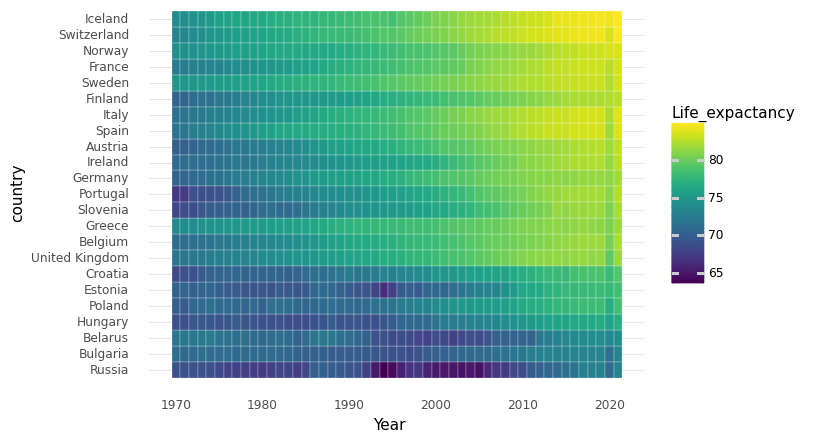

<ggplot: (131618243060)>

In [11]:
data8020 = data_life.query("Year > 1969 and Year < 2022")

p = (ggplot(data8020, aes("Year", "country", fill = "Life_expactancy")) 
  + geom_tile(color="white") 
  + scale_y_discrete(limits = pos)  
  + scale_fill_cmap("viridis")
  + theme_minimal())

p.save("Figs/Heatmap.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300)
p


## Plotting distributions 

To see the danger of summary statistics we can look at the following dating data from OkCupid from the book Dataclysm where we have the mode of the age men and women prefer (according to the app). 


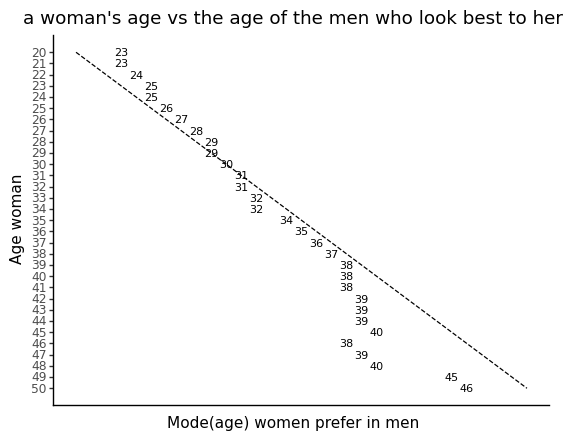

<ggplot: (131619533023)>

In [12]:
# Data on men's preference 
data1 = pd.DataFrame({"Age" : [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
                      "Prefer" : [20, 20, 21, 21, 21, 21, 22, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 22, 20, 20, 21, 21, 20, 23, 21, 24, 20, 20, 23, 20, 22],
                      "Data_set" : "Men"})
data1["Prefer_str"] = [str(val) for val in data1["Prefer"]]

# Data on women's preference
data2 = pd.DataFrame({"Age" :    [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
                      "Prefer" : [23, 23, 24, 25, 25, 26, 27, 28, 29, 29, 30, 31, 31, 32, 32, 34, 35, 36, 37, 38, 38, 38, 39, 39, 39, 40, 38, 39, 40, 45, 46],
                      "Data_set" : "Men"})
data2["Prefer_str"] = [str(val) for val in data2["Prefer"]]

# For drawing identity line in the plots
data_line = pd.DataFrame({"x" : [20, 50],
                          "y" : [20, 50],
                      "Data_set" : "Men"})

p1 = (ggplot(data1)
    + geom_line(data=data_line, mapping=aes(x="x", y="y"), linetype="dashed")
    + geom_text(aes(x="Prefer", y="Age", label="Prefer_str"), size=8.0)
    + scale_y_reverse(breaks=range(20, 51))
    + scale_x_continuous(limits=(20, 50), 
                         breaks=None)
    + labs(x = "Mode(age) men prefer in women", y = "Age man", title = "a man's age vs the age of the women who look best to him")
    + theme_classic())

p2 = (ggplot(data2)
    + geom_line(data=data_line, mapping=aes(x="x", y="y"), linetype="dashed")
    + geom_text(aes(x="Prefer", y="Age", label="Prefer_str"), size=8.0)
    + scale_y_reverse(breaks=range(20, 51))
    + scale_x_continuous(limits=(20, 50), 
                         breaks=None)
    + labs(x = "Mode(age) women prefer in men", y = "Age woman", title = "a woman's age vs the age of the men who look best to her")
    + theme_classic())

p1.save(filename=dir_save + "Men.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p2.save(filename=dir_save + "Women.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)

p2


The danger here is that several distributions can have this mode;

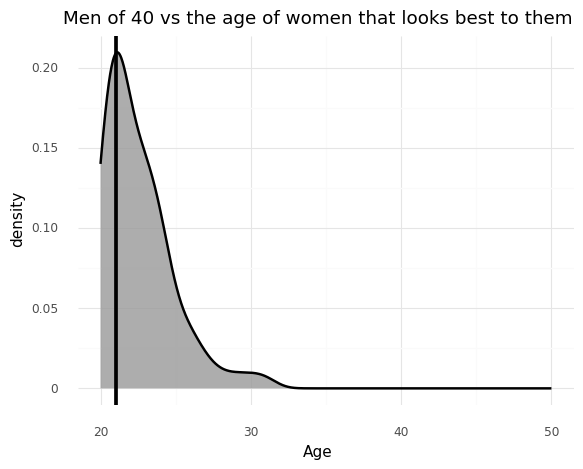

<ggplot: (131619887779)>

In [13]:
data1 = pd.DataFrame({"Age" : np.concatenate([np.repeat([20], 15), 
                                              np.repeat([21], 27), 
                                              np.repeat([22], 16), 
                                              np.repeat([23], 15), 
                                              np.repeat([24], 12), 
                                              np.repeat([25], 5), 
                                              np.repeat([26], 4), 
                                              np.repeat([27], 2), 
                                              np.repeat([28], 1), 
                                              np.repeat([29], 1), 
                                              np.repeat([30], 1), 
                                              np.repeat([31], 1)])})

data2 = pd.DataFrame({"Age" : np.concatenate([np.repeat([20], 10), 
                                              np.repeat([21], 11), 
                                              np.repeat([22], 10), 
                                              np.repeat([23], 2), 
                                              np.repeat([24], 3), 
                                              np.repeat([25], 3), 
                                              np.repeat([26], 3), 
                                              np.repeat([27], 2), 
                                              np.repeat([28], 1), 
                                              np.repeat([29], 1), 
                                              np.repeat([30], 1), 
                                              np.repeat([31], 1), 
                                              np.repeat([32], 1), 
                                              np.repeat([33], 1), 
                                              np.repeat([34], 1), 
                                              np.repeat([35], 1), 
                                              np.repeat([36], 2), 
                                              np.repeat([37], 4), 
                                              np.repeat([38], 4),
                                              np.repeat([39], 7), 
                                              np.repeat([40], 9), 
                                              np.repeat([41], 7), 
                                              np.repeat([42], 4), 
                                              np.repeat([43], 3), 
                                              np.repeat([44], 2), 
                                              np.repeat([45], 2), 
                                              np.repeat([46], 1), 
                                              np.repeat([47], 1), 
                                              np.repeat([48], 1), 
                                              np.repeat([49], 1), 
                                              np.repeat([50], 1)])})

p1 = (ggplot(data1, aes("Age"))
 + geom_density(fill=cbPalette[7], alpha=0.8, size=1.0, bw=0.8)
 + geom_vline(xintercept=21, size=1.5)
 + xlim(20, 50)
 + labs(title = "Men of 40 vs the age of women that looks best to them")
 + theme_minimal())

p2 = (ggplot(data2, aes("Age"))
 + geom_density(fill=cbPalette[7], alpha=0.8, size=1.0, bw=0.8)
 + geom_vline(xintercept=21, size=1.5)
 + xlim(20, 50)
 + labs(title = "Men of 40 vs the age of women that looks best to them")
 + theme_minimal())

p1.save(filename=dir_save + "Dist_ex1.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p2.save(filename=dir_save + "Dist_ex2.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)

p1

If we want to plot a single distribution the most common choice is a histogram, however, for these we must tune the number of bins.

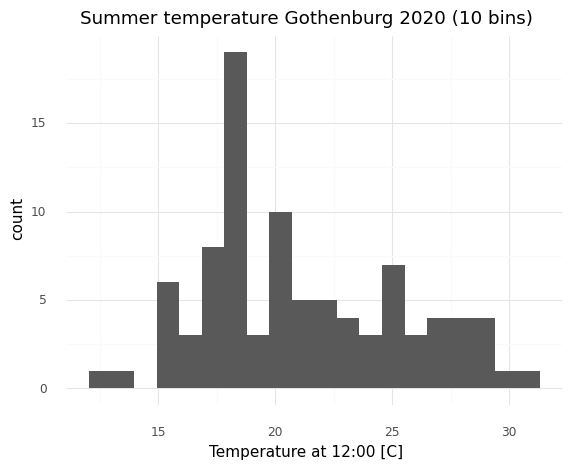

<ggplot: (131619430129)>

In [14]:
data_gbg_weather = pd.read_csv("Data/Weather_tidy.csv")
data_2020_summer = data_gbg_weather.query("(month == 'Jun' or month == 'Jul' or month == 'Aug') and year == 2020 and hour_of_day == 12")

p1 = (ggplot(data_2020_summer, aes("Temperature"))
    + geom_histogram(bins=10)
    + labs(x = "Temperature at 12:00 [C]", title = "Summer temperature Gothenburg 2020 (10 bins)")
    + theme_minimal())

p2 = (ggplot(data_2020_summer, aes("Temperature"))
    + geom_histogram(bins=20)
    + labs(x = "Temperature at 12:00 [C]", title = "Summer temperature Gothenburg 2020 (10 bins)")
    + theme_minimal())

p1.save(filename=dir_save + "Bins10.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p2.save(filename=dir_save + "Bins20.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)

p2

In general, especially if we have more data points, we can use density plots;

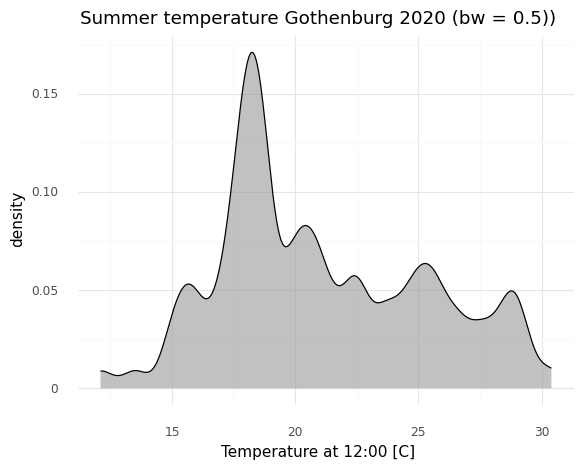

<ggplot: (131616533447)>

In [15]:
p1 = (ggplot(data_2020_summer, aes("Temperature"))
    + geom_density(bw=0.5, alpha=0.6, fill = cbPalette[7])
    + labs(x = "Temperature at 12:00 [C]", title = "Summer temperature Gothenburg 2020 (bw = 0.5))")
    + theme_minimal())

p2 = (ggplot(data_2020_summer, aes("Temperature"))
    + geom_density(bw=1.0, alpha=0.6, fill = cbPalette[7])
    + labs(x = "Temperature at 12:00 [C]", title = "Summer temperature Gothenburg 2020 (bw = 1.0)")
    + theme_minimal())

p1.save(filename=dir_save + "BW0D5.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p2.save(filename=dir_save + "BW1D0.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)

p1

Density plots are especially useful when comparing two distributions;

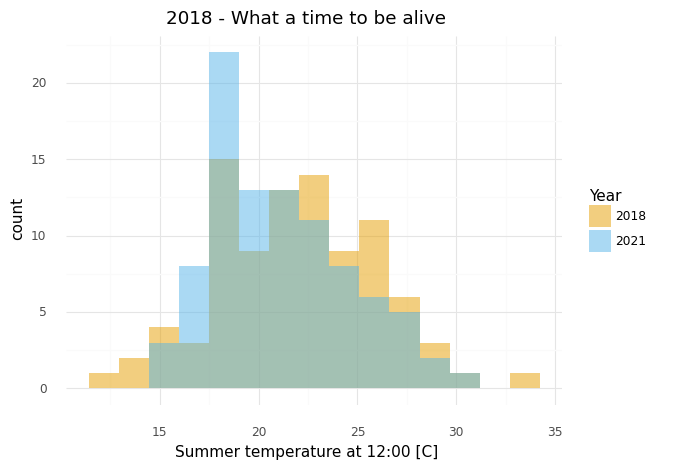

<ggplot: (131616252630)>

In [16]:
data_1820_summer = data_gbg_weather.query("(month == 'Jun' or month == 'Jul' or month == 'Aug') and (year == 2021 or year == 2018) and hour_of_day == 12")
data_1820_summer = data_1820_summer.assign(year= pd.Categorical(data_1820_summer["year"]))

p1 = (ggplot(data_1820_summer, aes("Temperature", fill = "year"))
    + geom_density(aes(fill = "year"), alpha=0.5, bw=0.8)
    + scale_fill_manual(values=cbPalette, name = "Year")
    + labs(x = "Summer temperature at 12:00 [C]", title = "2018 - What a time to be alive")
    + theme_minimal())

p2 = (ggplot(data_1820_summer, aes("Temperature", fill = "year"))
    + geom_histogram(bins=15, alpha=0.5, position = "identity")
    + scale_fill_manual(values=cbPalette, name = "Year")
    + labs(x = "Summer temperature at 12:00 [C]", title = "2018 - What a time to be alive")
    + theme_minimal())
    
p1.save(filename=dir_save + "Two_dist_dens.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p2.save(filename=dir_save + "Two_dist_hist.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)

p2


Naturally, however, everything has an end and to many categories cause problems in densities plots, we need something better.

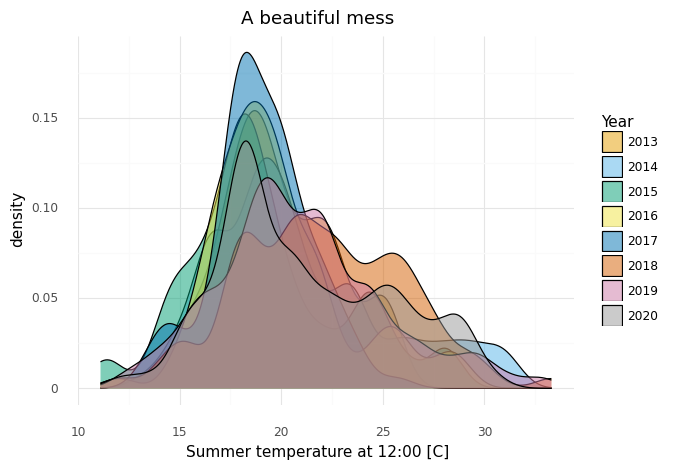

<ggplot: (131616644545)>

In [17]:
data_13_to_20_summer = data_gbg_weather.query("(month == 'Jun' or month == 'Jul' or month == 'Aug') and (year < 2021 and year > 2012) and hour_of_day == 12")
data_13_to_20_summer = data_13_to_20_summer.assign(year= pd.Categorical(data_13_to_20_summer["year"]))

p = (ggplot(data_13_to_20_summer, aes("Temperature", fill = "year"))
    + geom_density(aes(fill = "year"), alpha=0.5, bw=0.8)
    + scale_fill_manual(values=cbPalette, name = "Year")
    + labs(x = "Summer temperature at 12:00 [C]", title = "A beautiful mess")
    + theme_minimal())

p.save(filename=dir_save + "Dens_many.png", width=BASE_WIDTH, height=BASE_HEIGHT, dpi=300, verbose=False)
p


Here we can try to plot summary measures, so as the mean and standard deviation per month:

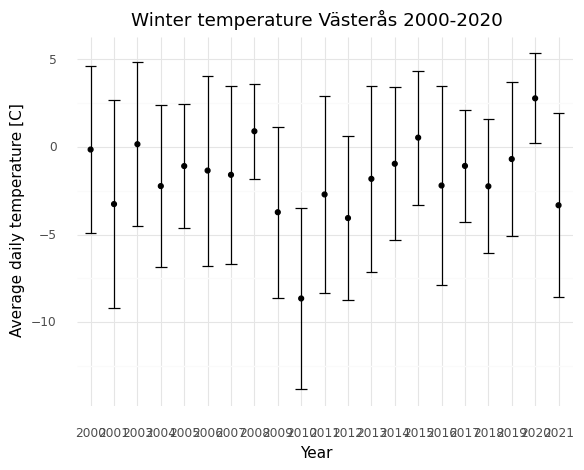

<ggplot: (131616605218)>

In [18]:
data_winter_sum = pd.read_csv("Data/Winter_vås_summary.csv")
data_winter_sum = data_winter_sum.assign(year= pd.Categorical(data_winter_sum["year"]))

p = (ggplot(data_winter_sum, aes("year", "mean_T"))
    + geom_point() 
    + geom_errorbar(aes(ymin = "mean_T - sd", ymax = "mean_T + sd"))
    + labs(y = "Average daily temperature [C]", x = "Year", title="Winter temperature Västerås 2000-2020")
    + theme_minimal())

p.save(filename=dir_save + "Temp_mean_sd.png", width=BASE_WIDTH*1.5, height=BASE_HEIGHT, dpi=300, verbose=False)
p


Distributions are rarely symmetrical, hence box-plots are nice alternatives;

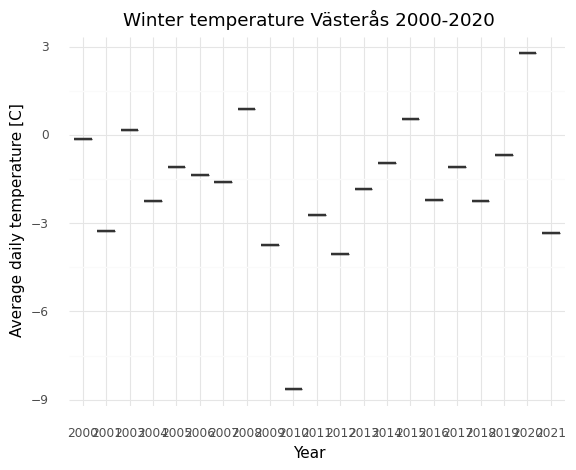

<ggplot: (131617057985)>

In [22]:
data_winter = pd.read_csv("Data/Winter_vås_summary.csv")
data_winter = data_winter.assign(year= pd.Categorical(data_winter["year"]))

p = (ggplot(data_winter, aes("year", "mean_T"))
    + geom_boxplot(fill = cbPalette[0])
    + labs(y = "Average daily temperature [C]", x = "Year", title="Winter temperature Västerås 2000-2020")
    + theme_minimal())

p.save(filename=dir_save + "Temp_box.png", width=BASE_WIDTH*1.5, height=BASE_HEIGHT, dpi=300, verbose=False)
p

But boxplots have problems, for example bi-modial distributions. Hence it might be better to use a violin plot, and to make everything even better, show the data points.

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 10.5 x 5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Temp_violin1.png
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:158: PlotnineWarning: Groups with fewer than 2 data points have been removed.
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:158: PlotnineWarning: Groups with fewer than 2 data points have been removed.
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: To compute th

C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:158: PlotnineWarning: Groups with fewer than 2 data points have been removed.
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:158: PlotnineWarning: Groups with fewer than 2 data points have been removed.
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:155: PlotnineWarning: To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`
C:\Users\me\anaconda3\lib\site-packages\plotnine\stats\stat_density.py:158: PlotnineWarning: Groups with fewer than 2 data points have bee

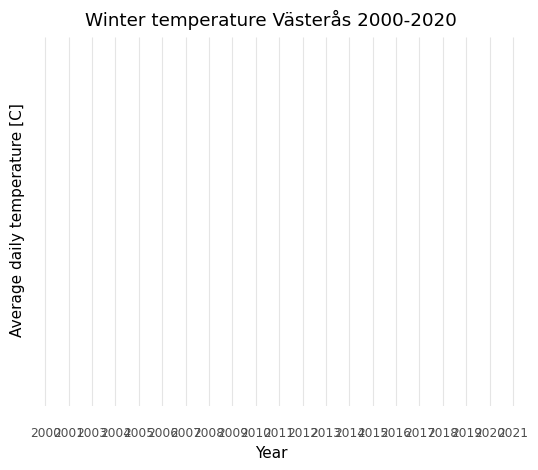

<ggplot: (131620220314)>

In [20]:
p1 = (ggplot(data_winter, aes("year", "mean_T"))
    + geom_violin(fill = cbPalette[7])
    + labs(y = "Average daily temperature [C]", x = "Year", title="Winter temperature Västerås 2000-2020")
    + theme_minimal())


p2 = (ggplot(data_winter, aes("year", "mean_T"))
    + geom_violin(fill = cbPalette[7], alpha=0.6, color=None)
    + geom_jitter(width=0.1, size=0.5)
    + labs(y = "Average daily temperature [C]", x = "Year", title="Winter temperature Västerås 2000-2020")
    + theme_minimal())

p1.save("Figs/Temp_violin1.png", width=BASE_WIDTH*1.5, height=BASE_HEIGHT, dpi=300)
p2.save("Figs/Violin2.png", width=BASE_WIDTH*1.5, height=BASE_HEIGHT, dpi=300)

p1

## Teaser for next lecture 

Next lecture we will talk about colors. The relevant question here, why is this a bad plot:

C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 14.0 x 7.5 in image.
C:\Users\me\anaconda3\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: Figs/Map_ex.png


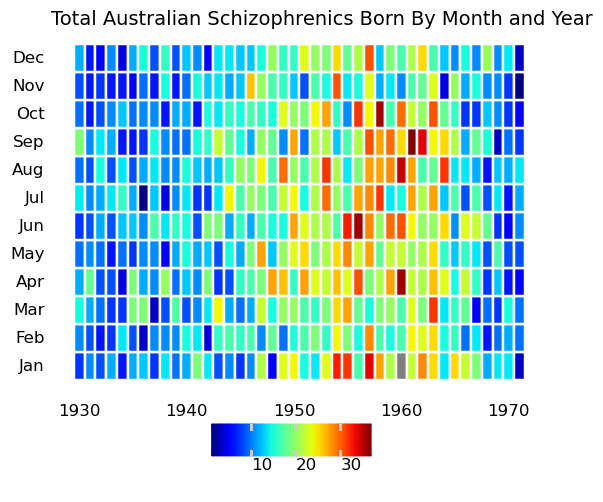

<ggplot: (131619588081)>

In [21]:
data_schz = pd.read_csv("Data/Aus_schz.csv")

label_month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
p = (ggplot(data_schz, aes("year", "month", fill = "SczBroad")) 
  + geom_tile(colour="white", size=1.0, stat="identity") 
  + scale_fill_cmap("jet")
  + scale_y_continuous(breaks=range(1, 13), labels=label_month)
  + labs(x = "", y = "", title = "Total Australian Schizophrenics Born By Month and Year") 
  + theme(plot_title = element_text(color="black",hjust=0,vjust=1, size=14),
          panel_background = element_rect(fill="white"),
          panel_border = element_rect(fill=None, color="white", size=0.5, linetype="solid"),
          panel_grid_major = element_blank(),
          panel_grid_minor = element_blank(),
          axis_line = element_blank(),
          axis_ticks = element_blank(), 
          axis_text = element_text(color="black", size=12),
          axis_text_y  = element_text(hjust=1),
          legend_background = element_blank(),
          legend_text = element_text(color="black", size=12),
          legend_position = "bottom",
          legend_title=element_blank()))

p.save("Figs/Map_ex.png", width=BASE_WIDTH*2.0, height=BASE_HEIGHT*1.5, dpi=300)

p